In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import KFold,cross_val_score


In [2]:
plt.style.use("seaborn-whitegrid")
df_unnorm = pd.read_csv('unnormalized_train.csv',index_col=0)
df_unnorm_pred = pd.read_csv('unnormalized_test.csv')

df_norm = pd.read_csv('normalized_train.csv',index_col=0)
df_norm_pred = pd.read_csv('normalized_test.csv')

In [3]:
#################### 未归一化数据 ####################
# Splitting the data into train and test
X_train_un, X_test_un, y_train, y_test = train_test_split(df_unnorm.iloc[:,:-1], df_unnorm.iloc[:,-1], test_size=0.2, random_state=42)

# 使用filter method进行特征选择
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train_un, y_train)
important_features_idx = selector.get_support()
important_features = np.where(important_features_idx)[0]
print("Important features are:", df_unnorm.columns[important_features])

# select the important features as the input of the model
X_train_selected_un = X_train_un.iloc[:,important_features]
X_test_selected_un = X_test_un.iloc[:,important_features]

Important features are: Index(['default', 'contact', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [4]:
#################### 归一化数据 ####################
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_norm.iloc[:,:-1], df_norm.iloc[:,-1], test_size=0.2, random_state=42)

# # 使用 Lasso 进行特征选择
# from sklearn.linear_model import LassoCV
# lasso = LassoCV(cv=5).fit(X_train, y_train)
# coef = np.abs(lasso.coef_)
# important_features_idx = coef > 1e-5
# print("Number of features selected:", important_features_idx.sum())
# important_features = np.where(important_features_idx)[0]
# print("Important features are:", df_unnorm.columns[important_features])

# 使用filter method进行特征选择
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)
important_features_idx = selector.get_support()
important_features = np.where(important_features_idx)[0]
print("Important features are:", df_unnorm.columns[important_features])

# select the important features as the input of the model
X_train_selected = X_train.iloc[:,important_features]
X_test_selected = X_test.iloc[:,important_features]


Important features are: Index(['education', 'loan', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m'],
      dtype='object')


# Decision Tree

max_depth=5的5-fold交叉验证平均准确率：0.8407184091995413
max_depth=6的5-fold交叉验证平均准确率：0.846373625667586
max_depth=7的5-fold交叉验证平均准确率：0.849622537630859
max_depth=8的5-fold交叉验证平均准确率：0.8544355810044634
max_depth=9的5-fold交叉验证平均准确率：0.8582860555200524
max_depth=10的5-fold交叉验证平均准确率：0.8589477548717097
max_depth=11的5-fold交叉验证平均准确率：0.8669795852510959
max_depth=12的5-fold交叉验证平均准确率：0.8699877192610961
max_depth=13的5-fold交叉验证平均准确率：0.8775383149823567
max_depth=14的5-fold交叉验证平均准确率：0.8772374907222551
max_depth=15的5-fold交叉验证平均准确率：0.8794033701945535
max_depth=16的5-fold交叉验证平均准确率：0.8810878973684597
max_depth=17的5-fold交叉验证平均准确率：0.8809675830481462
max_depth=18的5-fold交叉验证平均准确率：0.883253713495999
max_depth=19的5-fold交叉验证平均准确率：0.8828926619440434
max_depth=20的5-fold交叉验证平均准确率：0.8854194889019077
最佳max_depth：20
对应的5-fold交叉验证平均准确率：0.8854194889019077


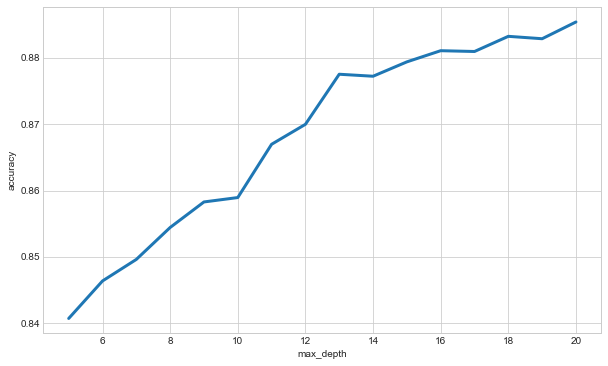

In [33]:
##############################################
############### 特征选择前的模型 ##############
##############################################

# 设置5-fold交叉验证
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 设置不同的max_depth值
max_depth_values = range(5, 21)  # 从5到20

# 存储交叉验证的平均准确率
cv_accuracies = []

for max_depth in max_depth_values:
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # 使用交叉验证计算准确率
    cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores)
    
    cv_accuracies.append(cv_mean_accuracy)
    print(f"max_depth={max_depth}的5-fold交叉验证平均准确率：{cv_mean_accuracy}")

# 找到最佳max_depth和对应的准确率
best_max_depth = max_depth_values[np.argmax(cv_accuracies)]
best_accuracy = max(cv_accuracies)

print(f"最佳max_depth：{best_max_depth}")
print(f"对应的5-fold交叉验证平均准确率：{best_accuracy}")

# plot the accuracy of the model for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cv_accuracies, linewidth=3)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

max_depth=5的5-fold交叉验证平均准确率：0.8390939916772228
max_depth=6的5-fold交叉验证平均准确率：0.8449597887470388
max_depth=7的5-fold交叉验证平均准确率：0.8494418919523017
max_depth=8的5-fold交叉验证平均准确率：0.8555182741485152
max_depth=9的5-fold交叉验证平均准确率：0.8619255919884445
max_depth=10的5-fold交叉验证平均准确率：0.8689345628732024
max_depth=11的5-fold交叉验证平均准确率：0.8780191650473033
max_depth=12的5-fold交叉验证平均准确率：0.886081138482683
max_depth=13的5-fold交叉验证平均准确率：0.8918266619538165
max_depth=14的5-fold交叉验证平均准确率：0.8962486871798714
max_depth=15的5-fold交叉验证平均准确率：0.899708007809142
max_depth=16的5-fold交叉验证平均准确率：0.9023853509634467
max_depth=17的5-fold交叉验证平均准确率：0.9043405864892146
max_depth=18的5-fold交叉验证平均准确率：0.9060251996310077
max_depth=19的5-fold交叉验证平均准确率：0.9068674586933352
max_depth=20的5-fold交叉验证平均准确率：0.9081910791033062
最佳max_depth：20
对应的5-fold交叉验证平均准确率：0.9081910791033062


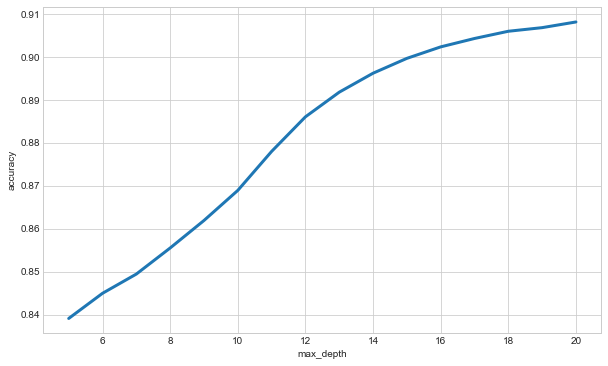

In [34]:
##############################################
############### 特征选择后的模型 ##############
##############################################

# 设置5-fold交叉验证
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# 设置不同的max_depth值
max_depth_values = range(5, 21)  # 从1到10

# 存储交叉验证的平均准确率
cv_accuracies = []

for max_depth in max_depth_values:
    dt_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    
    # 使用交叉验证计算准确率
    cv_scores = cross_val_score(dt_clf, X_train_selected, y_train, cv=k_fold, scoring='accuracy')
    cv_mean_accuracy = np.mean(cv_scores)
    
    cv_accuracies.append(cv_mean_accuracy)
    print(f"max_depth={max_depth}的5-fold交叉验证平均准确率：{cv_mean_accuracy}")

# 找到最佳max_depth和对应的准确率
best_max_depth = max_depth_values[np.argmax(cv_accuracies)]
best_accuracy = max(cv_accuracies)

print(f"最佳max_depth：{best_max_depth}")
print(f"对应的5-fold交叉验证平均准确率：{best_accuracy}")

# plot the accuracy of the model for different max_depth values
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, cv_accuracies, linewidth=3)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [35]:
# test in test set
dt_clf = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dt_clf.fit(X_train_selected, y_train)

print(f"Accuracy on test set: {dt_clf.score(X_test_selected, y_test)}")

Accuracy on test set: 0.9078329924196847


In [31]:
####################################################################
# 特征选择后的模型,并加入min_samples_split和min_samples_leaf参数选择 #
####################################################################

# 创建决策树分类器实例
dt_clf = DecisionTreeClassifier(random_state=42)

# 设置要搜索的max_depth值
param_grid = {'min_samples_split': range(20, 201, 10),  # 从20到200，步长为10
                'min_samples_leaf': range(10, 101, 10),
                'max_depth': range(1, 16)}  # 这里尝试从1到10的max_depth值

# 使用GridSearchCV寻找最佳max_depth
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test_selected)[:, 1])
roc_auc = auc(fpr, tpr)

# 输出最佳max_depth, min_samples_split, min_samples_leaf和对应的准确率
print(f"最佳max_depth：{grid_search.best_params_['max_depth']}")
print(f"最佳min_samples_split：{grid_search.best_params_['min_samples_split']}")
print(f"最佳min_samples_leaf：{grid_search.best_params_['min_samples_leaf']}")
print(f"对应的5-fold交叉验证平均准确率：{grid_search.best_score_}")

# 使用最佳参数在训练集上重新训练模型
best_dt_clf = grid_search.best_estimator_
best_dt_clf.fit(X_train_selected, y_train)

# 在测试集上评估模型性能
y_pred = best_dt_clf.predict(X_test_selected)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"最佳模型在测试集上的准确率：{test_accuracy}")


最佳max_depth：15
最佳min_samples_split：40
最佳min_samples_leaf：10
对应的5-fold交叉验证平均准确率：0.897211477744543
最佳模型在测试集上的准确率：0.8965226807845025


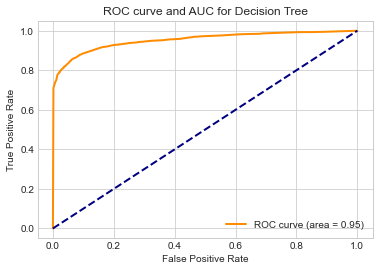

In [33]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Decision Tree')
plt.legend(loc="lower right")
plt.show()

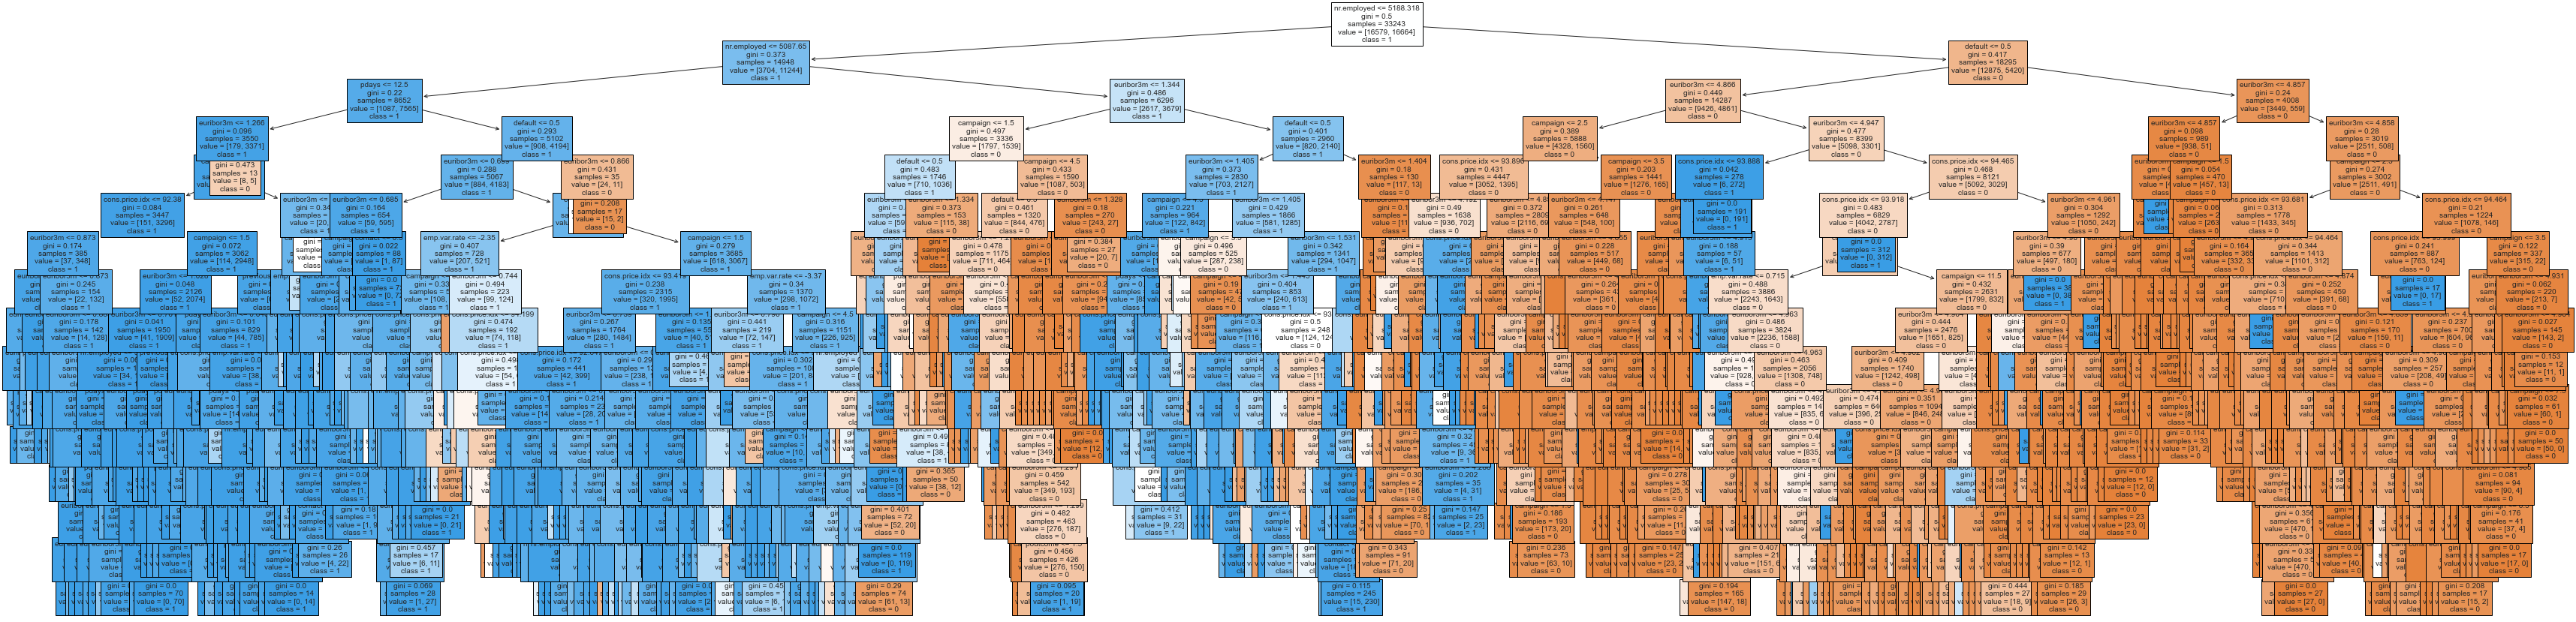

In [30]:
# Plotting the tree structure using sklearn.tree.plot_tree
plt.figure(figsize=(60,15))
tree_plot = tree.plot_tree(best_dt_clf, feature_names=df_unnorm.columns[important_features], class_names=['0','1'], filled=True, fontsize=10, rounded=True)
plt.show()

# Naïve Bayes

In [7]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
# 创建朴素贝叶斯分类器实例
gnb = GaussianNB()

param_grid = {'priors': [None, [0.2, 0.8], [0.4, 0.6], [0.6, 0.4], [0.8, 0.2]]}
grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
best_params = grid_search.best_params_

fpr, tpr, _ = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

print(f"Accuracy: {accuracy:.4f}")
print(f"Best parameters: {best_params}")

Accuracy: 0.7408
Best parameters: {'priors': [0.2, 0.8]}


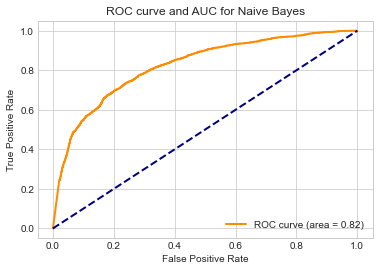

In [9]:
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

In [10]:
# test in test set
gnb = GaussianNB(priors=[0.2, 0.8])
gnb.fit(X_train, y_train)

print(f"Accuracy on test set: {gnb.score(X_test, y_test)}")

Accuracy on test set: 0.7408254121044399


# SVM

In [19]:
# SVM Classifier
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on training set: 0.725
Accuracy on test set: 0.728


---

In [20]:
df_norm = pd.read_csv('normalized_train.csv',index_col=0)
df_norm_pred = pd.read_csv('normalized_test.csv')
X_train, X_test, y_train, y_test = train_test_split(df_norm.iloc[:,:-1], df_norm.iloc[:,-1], test_size=0.2, random_state=42)

# Linear perceptron

In [21]:
# Linear perceptron Classifier
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(perceptron.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(perceptron.score(X_test, y_test)))


Accuracy on training set: 0.593
Accuracy on test set: 0.600


# Logistic Regression

In [22]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(logreg.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(logreg.score(X_test, y_test)))

Accuracy on training set: 0.749
Accuracy on test set: 0.753


# SVM

In [26]:
# SVM Classifier with kernel
# adding the kernel parameter
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.608
Accuracy on test set: 0.613


# KNN

In [23]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# calculating the accuracy of the model
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))


Accuracy on training set: 0.881
Accuracy on test set: 0.834
